In [99]:
import csv
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
##load syntactic ngram 
google_ngram = pd.read_excel('/Users/songheekim/Google Drive/Primary/Projects/VerbVector/Transitivity_from_GoogleNgram_v1.xlsx')

In [3]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [ ]:
#raw_before = pd.read_excel('/Users/songheekim/Google Drive/Primary/Projects/VerbVector/Verblists/verblist_v2.14_wb.xlsx', index_col='Lemma')
raw = pd.read_excel('/Users/songheekim/Google Drive/Primary/Projects/VerbVector/Verblists/verblist_v2.15_wb.xlsx', index_col='Lemma')
raw["SynClassNew"] = ""
raw = rearrange_col(raw, "SynClassNew", "SynClassSK")

In [ ]:
google_ngram.tail()

In [ ]:
#google_ngram.set_index('entry')

In [ ]:
raw.head()

In [ ]:
raw_dict = raw.to_dict(orient='index')

In [ ]:
orig_unerg_list = raw[raw['SynClassSK']=='unergative'].index
orig_unacc_list = raw[raw['SynClassSK']=='unaccusative'].index
orig_trans_list = raw[raw['SynClassSK']=='transitive'].index

In [ ]:
orig_unerg_list

In [ ]:
#### first figure out incompatible members: 
bad_unerg_list = []
for verb in orig_unerg_list: 
    intrans = raw_dict[verb]['google1950_intrans']
    trans = raw_dict[verb]['google1950_trans']
    if trans > intrans: 
        print (verb, 'intrans:', intrans, 'trans:', trans)
        bad_unerg_list.append(verb)
#print(bad_unerg_list)
print ('a total of', round(float((len(bad_unerg_list)/len(orig_unerg_list)))*100, 2), '% of unergative', 'is bad.')

In [ ]:
bad_unacc_list = [] 
for verb in orig_unacc_list: 
    intrans = raw_dict[verb]['google1950_intrans']
    trans = raw_dict[verb]['google1950_trans']
    print (verb, 'intrans:', intrans, 'trans:', trans)
    if trans > intrans: 
        #print (verb, 'intrans:', intrans, 'trans:', trans)
        bad_unacc_list.append(verb)
print ('a total of', round(float((len(bad_unacc_list)/len(orig_unacc_list)))*100, 2), '% of unaccusative', 'is bad.')

In [ ]:
bad_trans_list = [] 
for verb in orig_trans_list: 
    intrans = raw_dict[verb]['google1950_intrans']
    trans = raw_dict[verb]['google1950_trans']
    if trans < intrans: 
        print (verb, 'intrans:', intrans, 'trans:', trans)
        bad_trans_list.append(verb)
print ('a total of', round(float((len(bad_trans_list)/len(orig_trans_list)))*100, 2), '% of transitive', 'is bad.')
#bad_trans_list

In [ ]:
#purify_intrans = google_ngram[google_ngram['entry']=='purify'].intrans_use

In [ ]:
#google_ngram[google_ngram['entry']=='purify']

In [ ]:
x = google_ngram.loc[234160, 'totalcount']
x

In [ ]:
#type(google_ngram[google_ngram['entry']=='purify'].intrans_use)

#google_ngram[google_ngram['entry']=='purify'].intrans_use

In [ ]:
# bad_trans_list_new = [] 
# for verb in orig_trans_list: 
#     intrans = raw_dict[verb]['intr_google']
#     trans = raw_dict[verb]['trans_google']
#     if trans < intrans: 
#         #print (verb, 'intrans:', intrans, 'trans:', trans)
#         bad_trans_list_new.append(verb)
# #print ('a total of', round(float((len(bad_trans_list)/len(orig_trans_list)))*100, 2), '% of transitive', 'is bad.')
# #bad_trans_list_new
# intersection = [i for i in bad_trans_list if i in bad_trans_list_new]
# #print (len(intersection))

In [ ]:
################# PART2: update syntactic categorization based on Google N-gram results ################# 
###Principle
##1. If unaccusative, but Google N-gram says otherwise, change unaccusative --> transitive
##2. If unergative, but Google N-gram says otherwise, change unergative --> transitive
##3. If transitive, but Google N-gram says otherwise, change transitive --> transitive?

for entry, row in raw_dict.items():
    row['SynClassNew'] = ''
    if row['SynClassSK'] == 'unergative':
        if row['google1950_trans'] > row['google1950_intrans']:
            row['SynClassNew'] = 'transitive'
        else: 
            row['SynClassNew'] = row['SynClassSK']
    elif row['SynClassSK'] == 'unaccusative':
        if row['google1950_trans'] > row['google1950_intrans']:
            row['SynClassNew'] = 'transitive'
        else: 
            row['SynClassNew'] = row['SynClassSK']
    elif row['SynClassSK'] == 'transitive':
        if row['google1950_intrans'] > row['google1950_trans']:
            row['SynClassNew'] = '?transitive'
        else: 
            row['SynClassNew'] = row['SynClassSK']
    else: 
        print (entry, 'check SynClassSK')

In [ ]:
#raw_dict['use']
raw_updated = pd.DataFrame.from_dict(raw_dict, orient='index')
raw_updated.to_excel('/Users/songheekim/Google Drive/Primary/Projects/VerbVector/Verblists/verblist_v2.16.xlsx')

In [60]:
######### PART 3: start from Google N-gram updated spreadsheet #######################
raw = pd.read_excel('/Users/songheekim/Google Drive/Primary/Projects/VerbVector/Verblists/verblist_v2.16.xlsx', index_col='Lemma')
df = raw.sort_values(by=['SynClassNew', 'GrandIndex'], ascending=[False, True])
df['In'] = 1
df = rearrange_col(df, 'In', 'SynClassNew')

#### copy index column to access them just like any other column
df['word'] = df.index
df = rearrange_col(df, 'word', 'GrandIndex', right=False)

In [61]:
df.head()

,word,GrandIndex,Index,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClassLitrt,SynClassMemo,SynClassSK,SynClassNew,In,unerg_pb,unacc_pb,tr_pb,totalN_pb,most_frequent_pb,intr_g,tr_g,totalN_g,most_frequent_g,Note,SynClassCorpus,SynClassFinal,intr_google,trans_google,google1950_intrans,google1950_trans,AspClass_Consensus,SemanticType_JB,SemanticType_JB_edit,Typicality_JB,SemanticType_LC,Typicality_LC,SemClass_Consensus,CONSENSUS_JB,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F
Lemma,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
work,work,1,1,13.020,3.48,5.86,CREA,both,unergative,unergative,unergative,unergative,1,78.0,4.40,16.0,431.0,unerg,NaN,NaN,NaN,NaN,NaN,unerg,unergative,88.78,11.17,90.01,9.99,Process,other - general process,other - general process,5.0,other,NaN,other,other,verbs of creating and transformation,26.5knead,0.57,4,9,25,1.50,1.20,3,1,633.152,1.00,521.889,1.000,2421.10,1034.67
go,go,2,2,12.923,3.15,3.37,CREA,intransitive only,unergative,unergative PP arg,unergative,unergative,1,16.0,43.00,2.0,1029.0,unacc,NaN,NaN,NaN,NaN,NaN,unacc,unergative,95.67,4.32,94.45,5.55,Achievement,ch of location,ch of location,5.0,ch of location,5.0,ch of location,ch of location,"verbs of existence, verbs of motion","47.7meander, 51.1advance",0.98,2,17,48,1.35,1.00,2,1,597.688,0.97,524.071,1.000,974.49,NaN
run,run,3,3,12.316,4.31,4.47,CREA,both,unergative,unergative,unergative,unergative,1,18.0,34.00,44.0,374.0,tr,NaN,NaN,NaN,NaN,NaN,tr,unergative,76.27,23.65,71.00,29.00,Process,body mvt or posture,body movement or posture,5.0,manner of motion,5.0,manner of motion,manner of motion,"verbs of creating and transformation, verbs of existence, verbs of existence, verbs of motion","26.3prepare, 47.5.1swarm, 47.7meander, 51.3.2run",0.89,3,19,40,1.00,1.00,3,1,596.647,1.00,559.955,1.000,386.53,229.70
live,live,5,5,11.763,3.57,6.10,CREA,intransitive only,unergative/unaccusative,unergative PP arg,unergative,unergative,1,95.0,0.78,4.7,129.0,unerg,NaN,NaN,NaN,NaN,NaN,unerg,unergative,94.18,5.81,92.30,7.70,State,existence,existence,5.0,existence,5.0,existence,existence,"verbs of ingesting, lodge verbs, verbs of existence","39.6gorge, 46lodge, 47.1exist",0.89,4,16,21,1.15,1.25,3,1,629.886,1.00,553.769,0.963,3645.64,606.44
leave,leave,6,6,11.245,2.53,5.58,CREA,both,NaN,"unergative PP arg, transitive",unergative,unergative,1,13.0,8.80,40.0,354.0,tr,10.0,49.0,200.0,tr,polysemous,tr,unergativefailed,38.02,61.13,57.57,42.43,Achievement,ch of location,ch of location,5.0,ch of location,5.0,ch of location,ch of location,"verbs of change of possession, verbs of change of possession, verbs of change of possession, hold and keep verbs, verbs of motion, verbs of motion","13.3FUT:have, 13.4.1entrust, 13.5.1get, 15.2keep, 51.1advance, 51.2abandon",0.97,5,4,33,1.70,1.00,3,1,565.818,0.97,617.846,1.000,1630.15,502.36


In [62]:
unergative = df[df['SynClassNew']=='unergative'].index.tolist()
unaccusative = df[df['SynClassNew']=='unaccusative'].index.tolist()
transitive = df[df['SynClassNew']=='transitive'].index.tolist()

# print ('unergative', len(unergative))
# print ('unaccusative', len(unaccusative))
# print ('transitive', len(transitive))

In [65]:
colnames = list(df.columns.values)
cols_to_test = ['LogFreqHAL', 'AgeofAcqsn', 'Percentage_dom_PoS', 'Length', 'Ortho_N', 'Phono_N',\
                'OLD', 'PLD', 'NPhon', 'NSyll', 'I_Mean_RT', 'I_Mean_Accuracy', 'I_NMG_Mean_RT', \
                'I_NMG_Mean_Accuracy', 'N2_F', 'N3_F'] ##Note: Concreteness is not included

In [66]:
##### remove word with NaN if any
for c in cols_to_test:
    if df.loc[pd.isna(df[c])].shape[0] !=0: ### find any columns that contain NaN
        print (c)

df.loc[pd.isna(df['N3_F'])]

### this line prints out which item has NaN for 'N3_F', and its SynClassNew value
item_w_nan = df.loc[pd.isna(df['N3_F'])].index[0]
print (item_w_nan, ',', df.loc[item_w_nan]['SynClassNew'])

### for 'go', change In: 1 to 0 
df.loc['go', 'In'] = 0
df[df.index=='go'] ##to check if it is updated

N3_F


In [70]:
#df[df['tmp'].isin(new_unergative)]

In [71]:
df.head()

,word,GrandIndex,Index,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClassLitrt,SynClassMemo,SynClassSK,SynClassNew,In,unerg_pb,unacc_pb,tr_pb,totalN_pb,most_frequent_pb,intr_g,tr_g,totalN_g,most_frequent_g,Note,SynClassCorpus,SynClassFinal,intr_google,trans_google,google1950_intrans,google1950_trans,AspClass_Consensus,SemanticType_JB,SemanticType_JB_edit,Typicality_JB,SemanticType_LC,Typicality_LC,SemClass_Consensus,CONSENSUS_JB,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F
Lemma,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
work,work,1,1,13.020,3.48,5.86,CREA,both,unergative,unergative,unergative,unergative,1,78.0,4.40,16.0,431.0,unerg,NaN,NaN,NaN,NaN,NaN,unerg,unergative,88.78,11.17,90.01,9.99,Process,other - general process,other - general process,5.0,other,NaN,other,other,verbs of creating and transformation,26.5knead,0.57,4,9,25,1.50,1.20,3,1,633.152,1.00,521.889,1.000,2421.10,1034.67
go,go,2,2,12.923,3.15,3.37,CREA,intransitive only,unergative,unergative PP arg,unergative,unergative,0,16.0,43.00,2.0,1029.0,unacc,NaN,NaN,NaN,NaN,NaN,unacc,unergative,95.67,4.32,94.45,5.55,Achievement,ch of location,ch of location,5.0,ch of location,5.0,ch of location,ch of location,"verbs of existence, verbs of motion","47.7meander, 51.1advance",0.98,2,17,48,1.35,1.00,2,1,597.688,0.97,524.071,1.000,974.49,NaN
run,run,3,3,12.316,4.31,4.47,CREA,both,unergative,unergative,unergative,unergative,1,18.0,34.00,44.0,374.0,tr,NaN,NaN,NaN,NaN,NaN,tr,unergative,76.27,23.65,71.00,29.00,Process,body mvt or posture,body movement or posture,5.0,manner of motion,5.0,manner of motion,manner of motion,"verbs of creating and transformation, verbs of existence, verbs of existence, verbs of motion","26.3prepare, 47.5.1swarm, 47.7meander, 51.3.2run",0.89,3,19,40,1.00,1.00,3,1,596.647,1.00,559.955,1.000,386.53,229.70
live,live,5,5,11.763,3.57,6.10,CREA,intransitive only,unergative/unaccusative,unergative PP arg,unergative,unergative,1,95.0,0.78,4.7,129.0,unerg,NaN,NaN,NaN,NaN,NaN,unerg,unergative,94.18,5.81,92.30,7.70,State,existence,existence,5.0,existence,5.0,existence,existence,"verbs of ingesting, lodge verbs, verbs of existence","39.6gorge, 46lodge, 47.1exist",0.89,4,16,21,1.15,1.25,3,1,629.886,1.00,553.769,0.963,3645.64,606.44
leave,leave,6,6,11.245,2.53,5.58,CREA,both,NaN,"unergative PP arg, transitive",unergative,unergative,1,13.0,8.80,40.0,354.0,tr,10.0,49.0,200.0,tr,polysemous,tr,unergativefailed,38.02,61.13,57.57,42.43,Achievement,ch of location,ch of location,5.0,ch of location,5.0,ch of location,ch of location,"verbs of change of possession, verbs of change of possession, verbs of change of possession, hold and keep verbs, verbs of motion, verbs of motion","13.3FUT:have, 13.4.1entrust, 13.5.1get, 15.2keep, 51.1advance, 51.2abandon",0.97,5,4,33,1.70,1.00,3,1,565.818,0.97,617.846,1.000,1630.15,502.36


In [263]:
#### make df into numpy array 
df_to_array = df.reset_index() ### 'Lemma' is no longer index
cols_array = ['Lemma', 'GrandIndex', 'SynClassNew', 'In', 'LogFreqHAL', 'AgeofAcqsn', 'Length', 'Ortho_N', 'Phono_N',\
                'OLD', 'PLD', 'NPhon', 'NSyll', 'I_Mean_RT', 'I_Mean_Accuracy', 'I_NMG_Mean_RT', \
                'I_NMG_Mean_Accuracy', 'N2_F', 'N3_F'] ##Concreteness, Percentage_dom_PoS are not includeed
df_to_array = df_to_array[cols_array]

In [264]:
df_to_array

,Lemma,GrandIndex,SynClassNew,In,LogFreqHAL,AgeofAcqsn,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F
0,work,1,unergative,1,13.020,5.86,4,9,25,1.50,1.20,3,1,633.152,1.00,521.889,1.000,2421.10,1034.67
1,go,2,unergative,0,12.923,3.37,2,17,48,1.35,1.00,2,1,597.688,0.97,524.071,1.000,974.49,NaN
2,run,3,unergative,1,12.316,4.47,3,19,40,1.00,1.00,3,1,596.647,1.00,559.955,1.000,386.53,229.70
3,live,5,unergative,1,11.763,6.10,4,16,21,1.15,1.25,3,1,629.886,1.00,553.769,0.963,3645.64,606.44
4,leave,6,unergative,1,11.245,5.58,5,4,33,1.70,1.00,3,1,565.818,0.97,617.846,1.000,1630.15,502.36
5,speak,7,unergative,1,10.891,3.56,5,4,12,1.70,1.30,4,1,598.719,1.00,645.130,1.000,973.45,284.91
6,listen,8,unergative,1,10.432,5.40,6,2,6,1.85,1.65,4,2,526.455,0.97,576.520,1.000,1596.62,306.11
7,walk,9,unergative,1,10.407,3.45,4,9,17,1.70,1.25,3,1,580.576,0.97,540.607,1.000,1288.42,315.70
8,fly,11,unergative,1,10.289,3.05,3,7,15,1.75,1.25,3,1,541.697,1.00,598.250,1.000,58.84,52.95
9,sleep,12,unergative,1,10.151,2.79,5,6,12,1.50,1.20,4,1,553.629,1.00,638.333,1.000,567.81,176.46


In [265]:
### dictionary of {GrandIndex:Lemma}
index_lemma = df_to_array[['Lemma', 'GrandIndex']].set_index('GrandIndex').to_dict(orient='dict')['Lemma']
index_lemma

{1: 'work',
 2: 'go',
 3: 'run',
 5: 'live',
 6: 'leave',
 7: 'speak',
 8: 'listen',
 9: 'walk',
 11: 'fly',
 12: 'sleep',
 13: 'laugh',
 14: 'negotiate',
 15: 'shout',
 16: 'act',
 17: 'jump',
 18: 'dance',
 19: 'lie',
 20: 'cry',
 21: 'sing',
 22: 'skate',
 23: 'dive',
 24: 'scream',
 25: 'proceed',
 26: 'hesitate',
 27: 'behave',
 28: 'swim',
 29: 'hop',
 30: 'sail',
 31: 'yell',
 32: 'howl',
 33: 'pee',
 34: 'crawl',
 35: 'breathe',
 36: 'sneak',
 37: 'wander',
 38: 'moan',
 39: 'nod',
 40: 'blink',
 41: 'gamble',
 42: 'shuffle',
 43: 'fret',
 44: 'endure',
 45: 'whisper',
 46: 'shrug',
 47: 'prosper',
 48: 'prevail',
 49: 'depart',
 50: 'giggle',
 51: 'yawn',
 52: 'vomit',
 53: 'puke',
 54: 'hiss',
 55: 'cringe',
 56: 'inhale',
 57: 'weep',
 58: 'meditate',
 59: 'hustle',
 60: 'stoop',
 61: 'kneel',
 62: 'strut',
 63: 'squirm',
 64: 'shiver',
 65: 'bathe',
 66: 'jog',
 67: 'retaliate',
 68: 'squeal',
 69: 'mumble',
 70: 'dine',
 71: 'sneeze',
 72: 'squeak',
 73: 'burp',
 74: 'wail

In [266]:
df_to_array

,Lemma,GrandIndex,SynClassNew,In,LogFreqHAL,AgeofAcqsn,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F
0,work,1,unergative,1,13.020,5.86,4,9,25,1.50,1.20,3,1,633.152,1.00,521.889,1.000,2421.10,1034.67
1,go,2,unergative,0,12.923,3.37,2,17,48,1.35,1.00,2,1,597.688,0.97,524.071,1.000,974.49,NaN
2,run,3,unergative,1,12.316,4.47,3,19,40,1.00,1.00,3,1,596.647,1.00,559.955,1.000,386.53,229.70
3,live,5,unergative,1,11.763,6.10,4,16,21,1.15,1.25,3,1,629.886,1.00,553.769,0.963,3645.64,606.44
4,leave,6,unergative,1,11.245,5.58,5,4,33,1.70,1.00,3,1,565.818,0.97,617.846,1.000,1630.15,502.36
5,speak,7,unergative,1,10.891,3.56,5,4,12,1.70,1.30,4,1,598.719,1.00,645.130,1.000,973.45,284.91
6,listen,8,unergative,1,10.432,5.40,6,2,6,1.85,1.65,4,2,526.455,0.97,576.520,1.000,1596.62,306.11
7,walk,9,unergative,1,10.407,3.45,4,9,17,1.70,1.25,3,1,580.576,0.97,540.607,1.000,1288.42,315.70
8,fly,11,unergative,1,10.289,3.05,3,7,15,1.75,1.25,3,1,541.697,1.00,598.250,1.000,58.84,52.95
9,sleep,12,unergative,1,10.151,2.79,5,6,12,1.50,1.20,4,1,553.629,1.00,638.333,1.000,567.81,176.46


In [156]:
# array_unergative = df_to_array.loc[(df_to_array['SynClassNew']=='unergative') & (df_to_array['In']==1)]
# array_unaccusative = df_to_array.loc[(df_to_array['SynClassNew']=='unaccusative') & (df_to_array['In']==1)].drop(columns=['GrandIndex', 'In'])
# array_transitive = df_to_array.loc[(df_to_array['SynClassNew']=='transitive') & (df_to_array['In']==1)].drop(columns=['GrandIndex','In'])

In [267]:
#### select for df['In']=1
array_unergative = df_to_array.loc[(df_to_array['SynClassNew']=='unergative') & (df_to_array['In']==1)]
array_unaccusative = df_to_array.loc[(df_to_array['SynClassNew']=='unaccusative') & (df_to_array['In']==1)]
array_transitive = df_to_array.loc[(df_to_array['SynClassNew']=='transitive') & (df_to_array['In']==1)]

In [268]:
#### drop all non-numeral columns except 'Lemma', and give a new index
array_unergative2 = array_unergative.reset_index(drop=True).drop(columns=['SynClassNew', 'GrandIndex', 'In'])
array_unaccusative2 = array_unaccusative.reset_index(drop=True).drop(columns=['SynClassNew', 'GrandIndex', 'In'])
array_transitive2 = array_transitive.reset_index(drop=True).drop(columns=['SynClassNew', 'GrandIndex', 'In'])

In [286]:
####make dictionaries; i.e., from index (=array row number) to lemma
unerg_lemma_d = dict(zip(array_unergative2.index, array_unergative2.Lemma))
unacc_lemma_d = dict(zip(array_unaccusative2.index, array_unaccusative2.Lemma))
trans_lemma_d = dict(zip(array_transitive2.index, array_transitive2.Lemma))


#### check if the results are correct
# for i in range(len(unerg_lemma_d.keys())):
#     check = unerg_lemma_d[i] == array_unergative2.loc[i,'Lemma']
#     if not check: 
#         print ('unergative', i, 'th member needs check')
# for i in range(len(unacc_lemma_d.keys())):
#     check = unacc_lemma_d[i] == array_unaccusative2.loc[i,'Lemma']
#     if not check: 
#         print ('unaccusative', i, 'th member needs check')
# for i in range(len(trans_lemma_d.keys())):
#     check = trans_lemma_d[i] == array_transitive2.loc[i,'Lemma']
#     if not check: 
#         print ('transitive', i, 'th member needs check')

In [301]:
###### make a dictionary of header: i.e., column position to header 
array_unergative2_copy = array_unergative2.copy().drop(columns='Lemma')
header = array_unergative2_copy.columns.tolist() #i.e., ['LogFreqHAL', 'AgeofAcqsn', .. 'N2_F', 'N3_F']
header_d = {index: key for index, key in enumerate(header)}

###### drop Lemma so that only numerals are kept (g1 = unergative, g2 = unaccusative, g3 = transitive)
nd_g1 = array_unergative2.drop(columns=['Lemma']).to_numpy()
nd_g2 = array_unaccusative2.drop(columns=['Lemma']).to_numpy()
nd_g3 = array_transitive2.drop(columns=['Lemma']).to_numpy()

In [541]:
#header_d

{0: 'LogFreqHAL',
 1: 'AgeofAcqsn',
 2: 'Length',
 3: 'Ortho_N',
 4: 'Phono_N',
 5: 'OLD',
 6: 'PLD',
 7: 'NPhon',
 8: 'NSyll',
 9: 'I_Mean_RT',
 10: 'I_Mean_Accuracy',
 11: 'I_NMG_Mean_RT',
 12: 'I_NMG_Mean_Accuracy',
 13: 'N2_F',
 14: 'N3_F'}

In [306]:
print ('nd_g1 shape:', nd_g1.shape)
print ('nd_g2 shape:', nd_g2.shape)
print ('nd_g3 shape:', nd_g3.shape)

nd_g1 shape: (86, 15)
nd_g2 shape: (152, 15)
nd_g3 shape: (121, 15)


In [274]:
nd_g2

array([[1.08000e+01, 4.22000e+00, 4.00000e+00, ..., 1.00000e+00,
        6.56030e+02, 1.86240e+02],
       [1.07740e+01, 5.30000e+00, 5.00000e+00, ..., 1.00000e+00,
        1.28647e+03, 5.26750e+02],
       [1.07650e+01, 3.26000e+00, 4.00000e+00, ..., 1.00000e+00,
        1.71480e+03, 7.93600e+01],
       ...,
       [5.27300e+00, 9.11000e+00, 6.00000e+00, ..., 1.00000e+00,
        9.87010e+02, 6.03400e+01],
       [5.20400e+00, 1.28000e+01, 9.00000e+00, ..., 9.63000e-01,
        4.13820e+02, 9.87900e+01],
       [5.17000e+00, 1.10000e+01, 6.00000e+00, ..., 7.92000e-01,
        4.22600e+02, 3.99500e+01]])

In [327]:
#nd_g2[1]

In [ ]:
########## random selection and t-tests (max: 1000 times)
## 1. from g1, g2, g3, select 80, 80, 80 members (save this selection to a variable)
## 2. looping over q1 through q16, run t-tests; if fail at any q, note q and go back to 1 
## 3. if succeed, mark as successful and go back to 1 while n<1000


In [312]:
nd_g2.shape[0]

152

In [417]:
def ttest_is_significant (series1, series2, threshold=0.05, equal_var=False):
    statistic = stats.ttest_ind(series1, series2, equal_var=equal_var).statistic
    pvalue = stats.ttest_ind(series1, series2, equal_var=equal_var).pvalue
    #print (pvalue)
    if pvalue > threshold: 
        result = 'Insignificant'
    else:
        result = 'Significant'
    #print (result)
    return result

In [388]:
s1 = [1,2,1,2,1,2,1,2,1]
s2 = [10,20,11,21,11,21,11,20,11]
ttest_is_significant(s1, s2)

4.0856879990063914e-05
Significant


'Significant'

In [389]:
header_d[0]

'LogFreqHAL'

In [545]:
# g1_N = 70
# g2_N = 70
# g3_N = 70
# max_try = 50000
# attempt_n = 1
# column_n = nd_g1.shape[1]
# successful_set = []

# # for g1_N in range(70, nd_g1.shape[0]):
# #     for g2_N in range(60, 100):
# #         for g3_N in range(60, 100): 
# #             print (g1_N, g2_N, g3_N)
# #             attempt_n=1

# while attempt_n < max_try:
#     print ('Attempt', attempt_n)

#     #(1) random select N items in nd_g1, nd_g2 and nd_g3
#     g1_index = np.random.randint(nd_g1.shape[0], size=g1_N) ##i.e., choose 80 int in [0,,85] (when #row=86) 
#     g2_index = np.random.randint(nd_g2.shape[0], size=g2_N) ##i.e., choose 80 int in [0,,151] (when #row=152) 
#     g3_index = np.random.randint(nd_g3.shape[0], size=g3_N) ##i.e., choose 80 int in [0,,120] (when #row=121) 
#     nd_g1_sel = nd_g1[g1_index] #subset arrays
#     nd_g2_sel = nd_g2[g2_index]
#     nd_g3_sel = nd_g3[g3_index]

#     #(2) iterate over 16 columns, perform t-tests
#     test_dic = {}
#     for i in range(1, column_n):
#         #print (i)
#         #print (header_d[i])
#         test_dic[i] = {'g1-g2': '', 'g2-g3': '', 'g1-g3': ''}
#         g1_ith = nd_g1_sel[:, i]  ## g1 = ith column of nd_g1
#         g2_ith = nd_g2_sel[:, i]
#         g3_ith = nd_g3_sel[:, i]
#         test_dic[i]['g1-g2'] = ttest_is_significant(g1_ith, g2_ith, threshold=0.05)
#         test_dic[i]['g2-g3'] = ttest_is_significant(g2_ith, g3_ith, threshold=0.05)
#         test_dic[i]['g1-g3'] = ttest_is_significant(g1_ith, g3_ith, threshold=0.05)
#         if 'Significant' in test_dic[i].values():
#             #print ('Attempt', attempt_n, 'fails at column', i)
#             failed_test = [key for key, value in test_dic[i].items() if value=='Significant']
#             #print ('failed sets:', failed_test)
#             #attempt_n += 1
#             break  ## goes back to the while loop
#         else: 
# #             if i != column_n-1: 
# #                 continue ##goes back to the for loop
# #             else: 
# #                 print ('===============================================')
# #                 print ('Attempt', attempt_n, 'has found a perfect set!')
# #                 print ('===============================================')
# #                 successful_set.append(test_dic)
# #                 print (g1_index, g2_index, g3_index)

#             if i == column_n-1:  
#                 print ('===============================================')
#                 print ('Attempt', attempt_n, 'has found a perfect set!')
#                 print ('===============================================')
#                 successful_set.append(test_dic)
#                 print (g1_index, g2_index, g3_index)

                
#     attempt_n += 1 

# #print (len(successful_set))

In [421]:
len(successful_set)

7

In [485]:
#modified
def PopSamples(pool, num_subset):
    np.random.shuffle(pool)
    return pool[:num_subset]

def ttest_is_significant (series1, series2, threshold=0.05, equal_var=False):
    #statistic = stats.ttest_ind(series1, series2, equal_var=equal_var).statistic
    #pvalue = stats.ttest_ind(series1, series2, equal_var=equal_var).pvalue
    ret = stats.ttest_ind(series1, series2, equal_var=equal_var)
    #print (ret.pvalue)
    if ret.pvalue > threshold: 
        result = 1  # pass, i.e, 'Insignificant'
    else:
        result = 0  # fail, i.e, 'Significantly different distribution'
    #print (result)
    return result

def find_subset(g1_N, g2_N, g3_N, max_try=100, threshold=0.05):

    column_n = nd_g1.shape[1]
    successful_set = []

    # initialize pool status
    g1_pool = np.arange(nd_g1.shape[0])
    g2_pool = np.arange(nd_g2.shape[0])
    g3_pool = np.arange(nd_g3.shape[0])

    #print(g1_pool)

    #for i in range(10):
    #    g1_index = PopSamples(g1_pool, g1_N)
    #    #print(g1_pool)

    for attempt_n in range(max_try):
        #print ('Attempt', attempt_n)

        #(1) random select N items in nd_g1, nd_g2 and nd_g3
        g1_index = PopSamples(g1_pool, g1_N) ##i.e., choose 80 int in [0,,85] (when #row=86) 
        g2_index = PopSamples(g2_pool, g2_N) ##i.e., choose 80 int in [0,,151] (when #row=152) 
        g3_index = PopSamples(g3_pool, g3_N) ##i.e., choose 80 int in [0,,120] (when #row=121) 

        nd_g1_sel = nd_g1[g1_index] #subset arrays
        nd_g2_sel = nd_g2[g2_index]
        nd_g3_sel = nd_g3[g3_index]

        #(2) iterate over 16 columns, perform t-tests
        test_dic = {}
        take = 1
        for i in range(column_n):
            #print (i)
            #print (header_d[i])
            test_dic[i] = {}
            test_dic[i]['g1-g2'] = ttest_is_significant(nd_g1_sel[:,i], nd_g2_sel[:,i], threshold=threshold)
            test_dic[i]['g2-g3'] = ttest_is_significant(nd_g2_sel[:,i], nd_g3_sel[:,i], threshold=threshold)
            test_dic[i]['g1-g3'] = ttest_is_significant(nd_g1_sel[:,i], nd_g3_sel[:,i], threshold=threshold)
            take *= test_dic[i]['g1-g2']*test_dic[i]['g2-g3']*test_dic[i]['g1-g3']
            test_dic[i]['pass'] = take

        #print ('Attepmt')

        if take:  
            #print ('===============================================')
            #print ('Attempt', attempt_n, 'has found a perfect set!')
            #print ('===============================================')
            #print ("x0x")
            test_dic['g1_index'] = g1_index
            test_dic['g2_index'] = g2_index
            test_dic['g3_index'] = g3_index
            successful_set.append(test_dic)
            #print (g1_index, g2_index, g3_index)
        #else:
        #    print ("x.x")

    print(len(successful_set))


In [494]:
find_subset(nd_g1.shape[0], nd_g2.shape[0], nd_g3.shape[0], max_try=1, threshold=0.05)

0


In [460]:
find_subset(10, 10, 10, max_try=100, threshold=0.05)

7


In [477]:
find_subset(10, 10, 70, max_try=1000, threshold=0.05)

15


In [478]:
find_subset(10, 70, 10, max_try=1000, threshold=0.05)

16


In [479]:
find_subset(50, 10, 10, max_try=1000, threshold=0.05)

27


In [492]:
find_subset(50, 70, 70, max_try=300000, threshold=0.05)

0


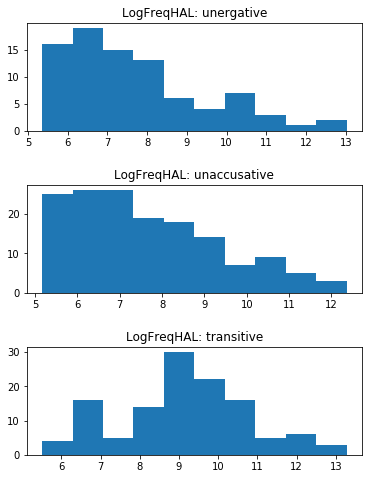

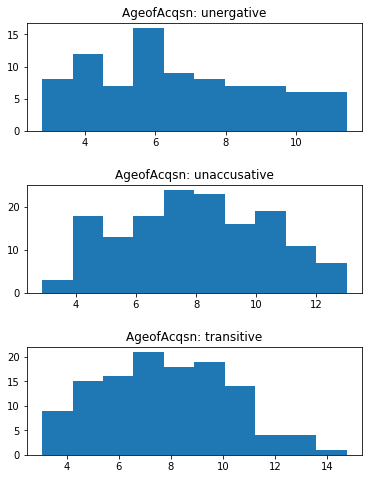

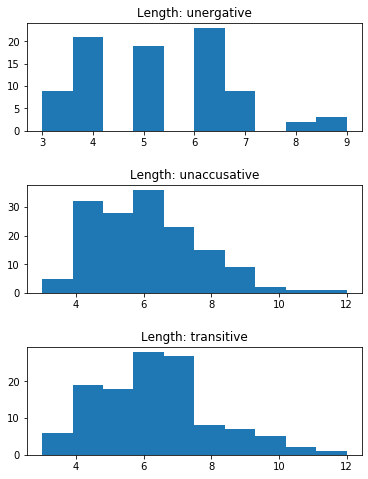

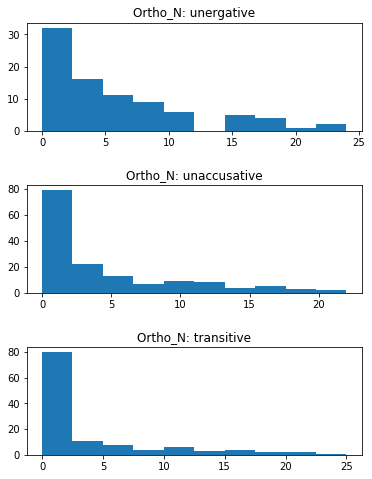

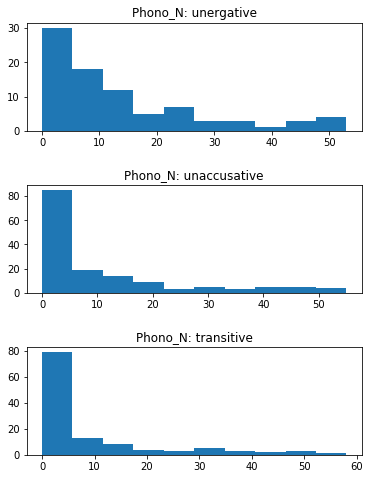

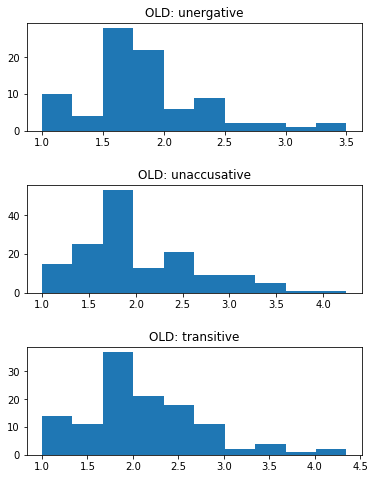

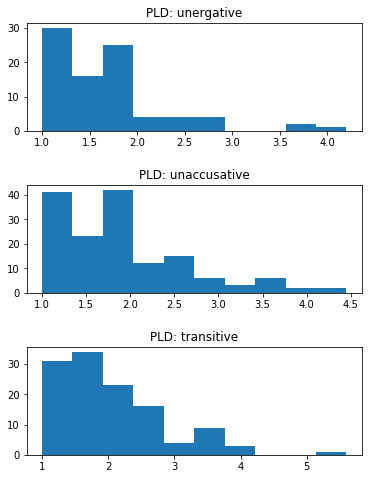

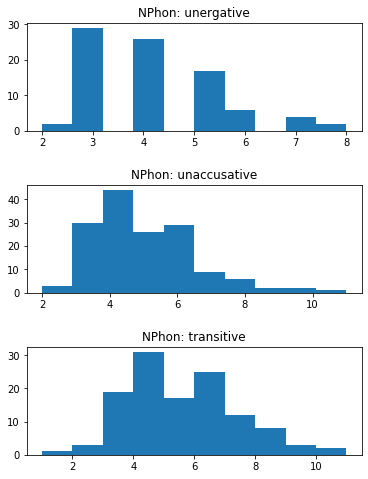

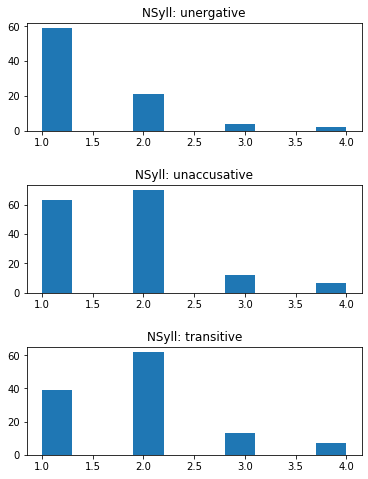

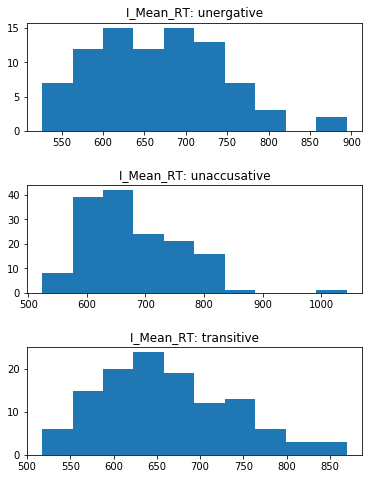

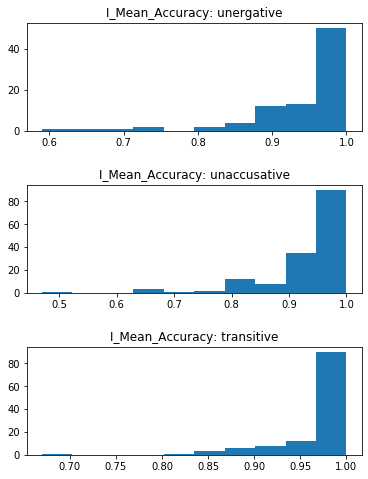

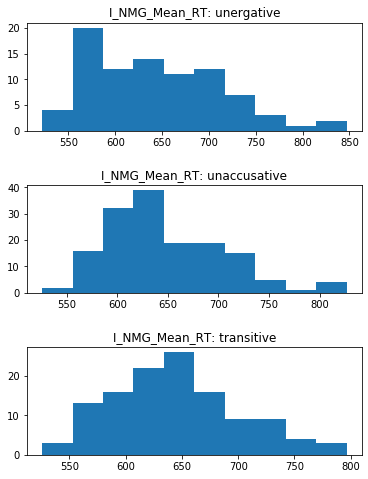

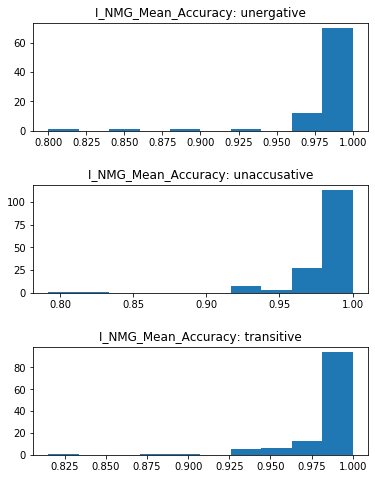

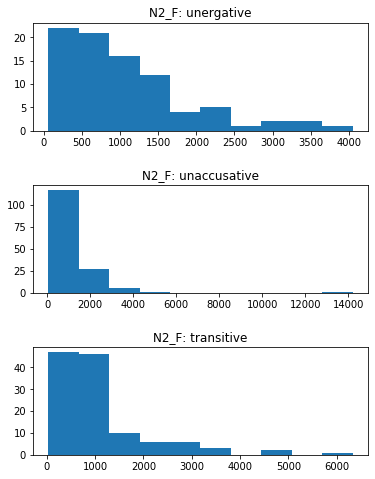

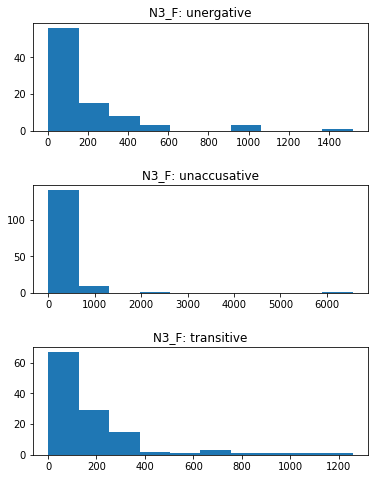

In [562]:
def show_raw_data_distribution(n):
    import matplotlib.pyplot as plt
    #plt.plot(np.arange(nd_g1.shape[0]),nd_g1[:,0], 'b.')
    fig, axis = plt.subplots(3)
    fig.subplots_adjust(bottom=0, top=1.5, hspace=0.5)
    axis[0].hist(nd_g1[:,n])
    axis[0].set_title(header_d[n]+": unergative")
    axis[1].hist(nd_g2[:,n])
    axis[1].set_title(header_d[n]+": unaccusative")
    axis[2].hist(nd_g3[:,n])
    axis[2].set_title(header_d[n]+": transitive")
    #print (header_d[n])
    
for i in range(15):
    show_raw_data_distribution(i)
#show_raw_data_distribution(1)

In [508]:
nd_g1[:,]

array([13.02 , 12.316, 11.763, 11.245, 10.891, 10.432, 10.407, 10.289,
       10.151,  9.507,  8.35 ,  8.097, 11.187, 10.198, 10.171,  9.995,
        9.492,  9.298,  9.243,  9.009,  8.914,  8.78 ,  8.666,  8.656,
        8.54 ,  8.408,  8.175,  8.108,  8.079,  8.058,  8.049,  8.045,
        7.878,  7.832,  7.669,  7.665,  7.629,  7.585,  7.58 ,  7.56 ,
        7.528,  7.473,  7.449,  7.41 ,  7.365,  7.308,  7.206,  7.195,
        7.18 ,  7.152,  7.034,  6.836,  6.753,  6.717,  6.687,  6.667,
        6.646,  6.597,  6.594,  6.593,  6.544,  6.507,  6.486,  6.412,
        6.378,  6.377,  6.346,  6.292,  6.246,  6.144,  6.078,  6.073,
        6.059,  5.875,  5.793,  5.7  ,  5.67 ,  5.666,  5.645,  5.624,
        5.565,  5.525,  5.425,  5.412,  5.407,  5.357])

In [493]:
from scipy.special import comb
print(comb(nd_g1.shape[0],60) * comb(nd_g2.shape[0],70) * comb(nd_g3.shape[0],70))

7.243007300954414e+100


In [102]:
### Previous attempt 
#### Create a dict that includes one Series for each syntactic category (for each low-level property)
#### i.e., dict = {property1: {'unergative': [...], 'unaccusative': [...], 'transitive':[...]}, property2: ...}
# for c in cols_to_test:
#     exec("%s={}" %c) #create a dictionary to be filled in below
    
# dict_list = [LogFreqHAL, AgeofAcqsn, Percentage_dom_PoS, Length, Ortho_N, Phono_N, OLD, PLD, NPhon, NSyll, \
#              I_Mean_RT, I_Mean_Accuracy, I_NMG_Mean_RT, I_NMG_Mean_Accuracy, N2_F, N3_F]

# dict_dict = dict(zip(cols_to_test, dict_list)) #i.e., dict_dict={'LogFreqHAL': {}, 'AgeofAcqsn': {}, ...}

# for k, v in dict_dict.items(): ###k=low-level quality, v=empty dictionary
#     print (k)
#     for s in ['unergative', 'unaccusative', 'transitive']:
#         #v[s] = df.loc[(df['SynClassNew']==s) & (df['In']==1)][k].to_list()
#         subset_df = df.loc[(df['SynClassNew']==s) & (df['In']==1)] ##df containing only items that are 'in'
#         v[s] = subset_df[['word', k]].apply(tuple, axis=1).values #e.g., [('work', 13.02), ('run', 12.31),,]
#         #print (dict_dict)
#     for test in ['unergative-unaccusative', 'unaccusative-transitive', 'unergative-transitive']:
#         s_recon1 = test.split('-')[0] #e.g., unergative
#         s_recon2 = test.split('-')[1] #e.g., unaccusative 
#         v[test] = stats.ttest_ind([i[1] for i in v[s_recon1]], [i[1] for i in v[s_recon2]], equal_var=False)
        
# #         if v[test].pvalue < 0.055:
# #             if np.mean(v[s_recon1]) > np.mean(v[s_recon2]):
# #                 print (v[s_recon1])
        
#     break 
    

    #v['unerg_unacc_statistic'] = stats.ttest_ind(v['unergative'], v['unaccusative'], equal_var=False).statistic
    #v['unerg_unacc_pvalue'] = round(stats.ttest_ind(v['unergative'], v['unaccusative'], equal_var=False).pvalue,4)
    #v['unacc_trans_statistic'] = round(stats.ttest_ind(v['unaccusative'], v['transitive'], equal_var=False).statistic,4)
    #v['unacc_trans_pvalue'] = round(stats.ttest_ind(v['unaccusative'], v['transitive'], equal_var=False).pvalue,4)
    #v['unerg_trans_statistic'] = stats.ttest_ind(v['unergative'], v['transitive'], equal_var=False).statistic
    #v['unerg_trans_pvalue'] = round(stats.ttest_ind(v['unergative'], v['transitive'], equal_var=False).pvalue,4)

LogFreqHAL
